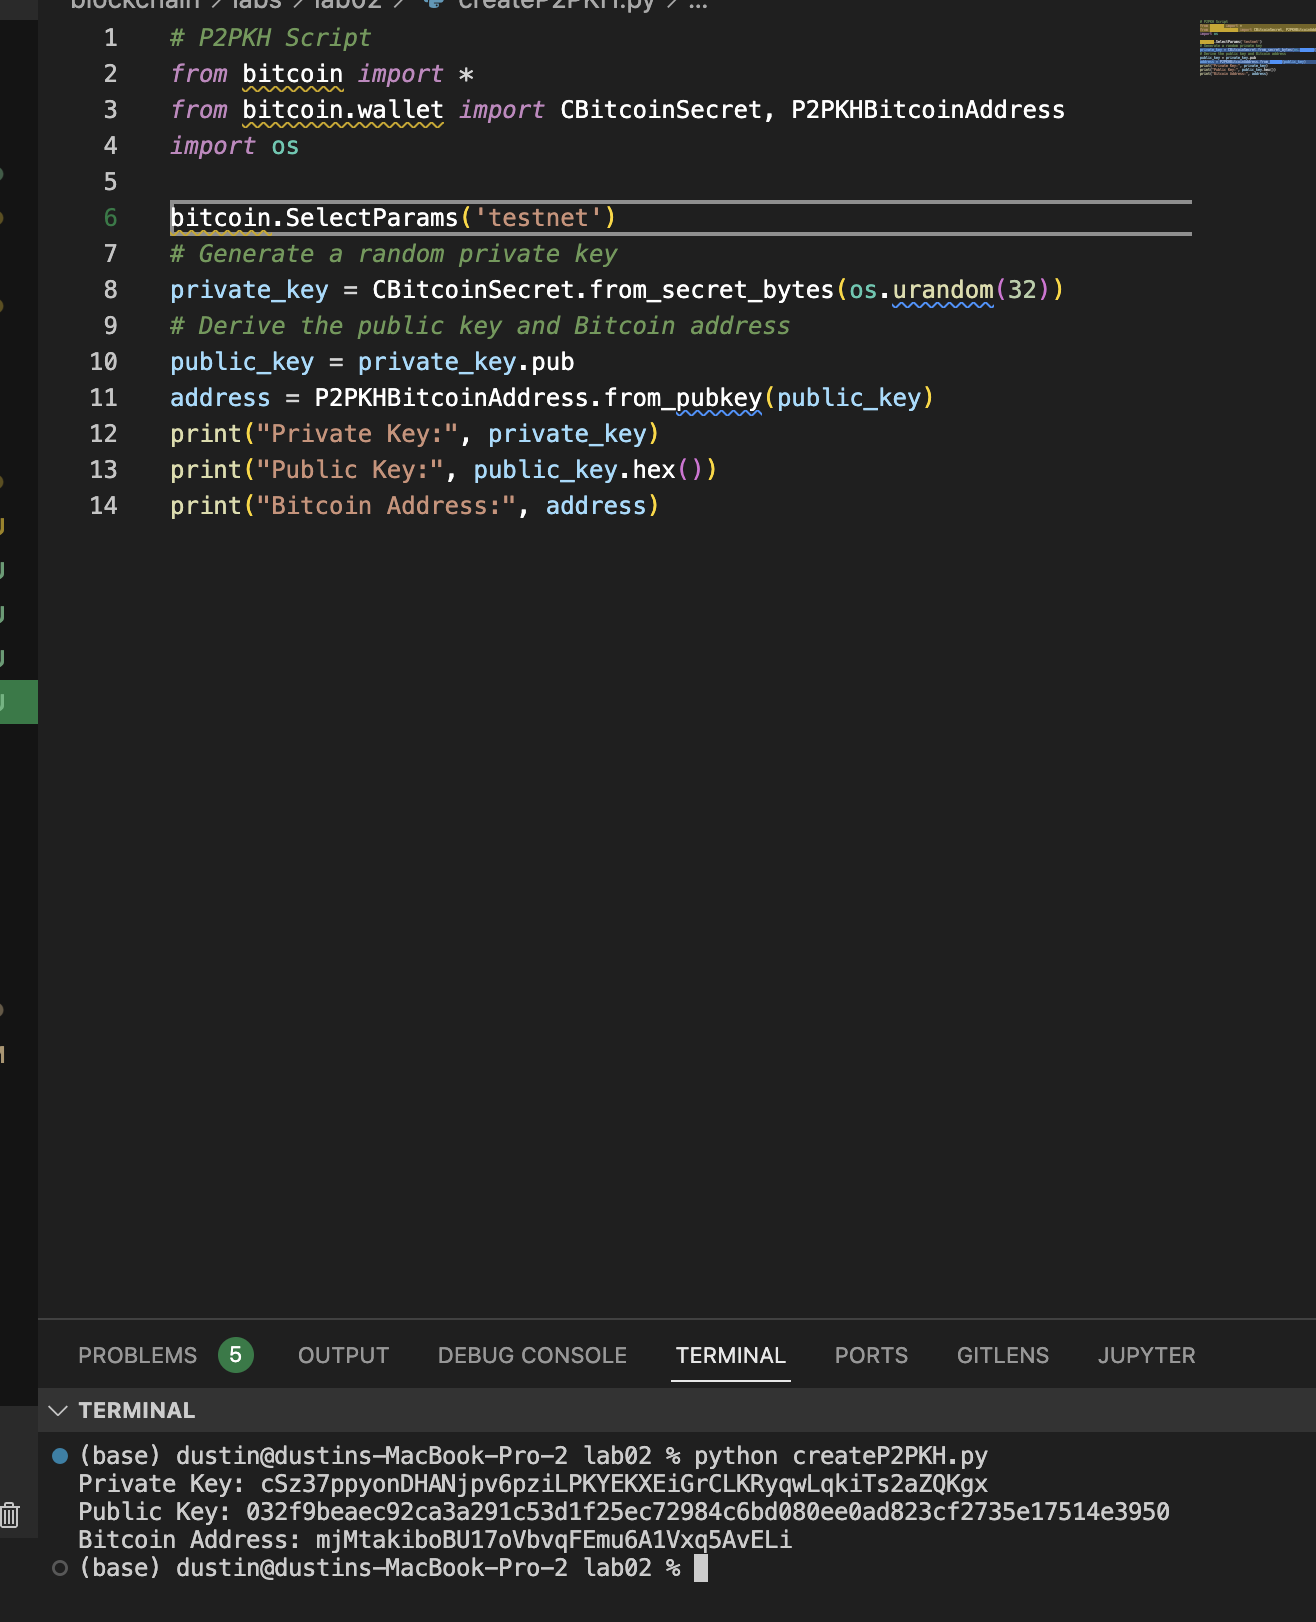

Private Key: cSz37ppyonDHANjpv6pziLPKYEKXEiGrCLKRyqwLqkiTs2aZQKgx
Public Key:032f9beaec92ca3a291c53d1f25ec72984c6bd080ee0ad823cf2735e17514e3950
Bitcoin Address: mjMtakiboBU17oVbvqFEmu6A1Vxq5AvELi

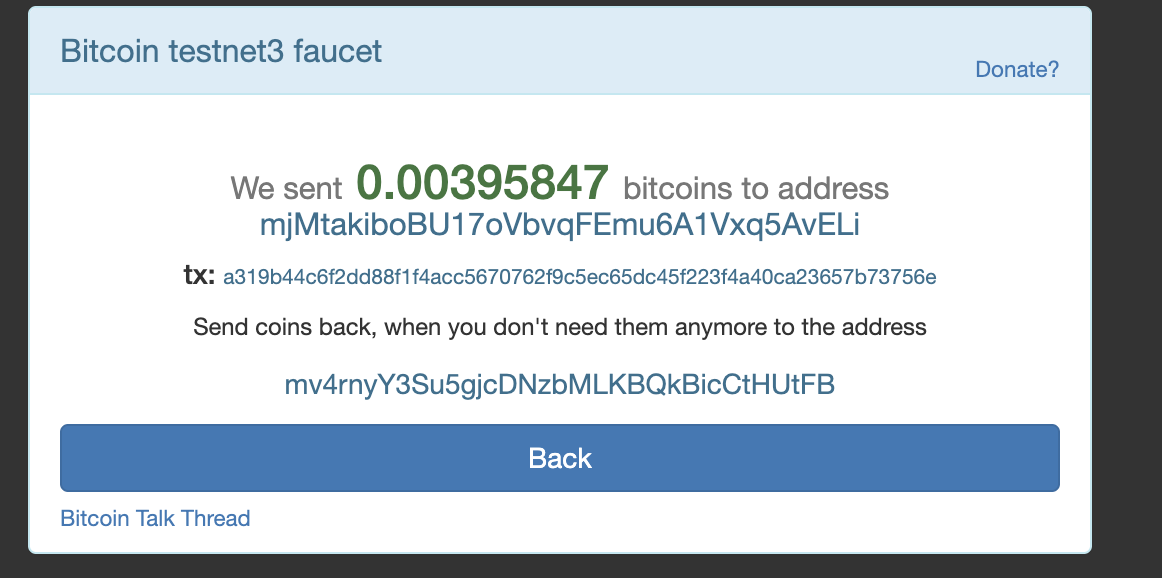

We sent 0.00395847 bitcoins to address
mjMtakiboBU17oVbvqFEmu6A1Vxq5AvELi

tx: a319b44c6f2dd88f1f4acc5670762f9c5ec65dc45f223f4a40ca23657b73756e
Send coins back, when you don't need them anymore to the address

mv4rnyY3Su5gjcDNzbMLKBQkBicCtHUtFB

Private Key 1: cTSebtTjRooKtvFpgznJiprVQAUTL7PHAyGgn6uJVGXhwwkx6jgp
Private Key 2: cSovutdQDj1cXUxhB6p7GWEYYJBGDPXUcHpBErAUPuXWQ7WTRaTK
Redeem Script: 5221028e03b2a4270b3cea8d7d31cf7b7dc7df999a4064e1e988b3d25c08ff4ca400ca21027cedea6a6db670360c123f1b74c6cdd661369792b346b2b9c24acdb6bb140e3d52ae
Multisig Address: 2N8pThDEssyUWbSKLtBmSkTgBYSR19Gg2Ec

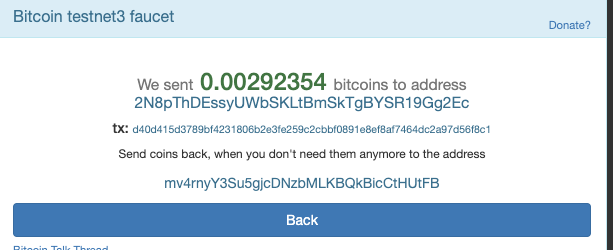

We sent 0.00292354 bitcoins to address
2N8pThDEssyUWbSKLtBmSkTgBYSR19Gg2Ec

tx: d40d415d3789bf4231806b2e3fe259c2cbbf0891e8ef8af7464dc2a97d56f8c1
Send coins back, when you don't need them anymore to the address

mv4rnyY3Su5gjcDNzbMLKBQkBicCtHUtFB

In [ ]:
from bitcoin import *
from bitcoin.wallet import CBitcoinSecret, P2SHBitcoinAddress
from bitcoin.core.script import CScript, OP_2, OP_CHECKMULTISIG
from binascii import unhexlify

bitcoin.SelectParams('testnet')

# Private keys and multisig address from the previous step
private_key1 = CBitcoinSecret("cTSebtTjRooKtvFpgznJiprVQAUTL7PHAyGgn6uJVGXhwwkx6jgp")
private_key2 = CBitcoinSecret("cSovutdQDj1cXUxhB6p7GWEYYJBGDPXUcHpBErAUPuXWQ7WTRaTK")
address = P2SHBitcoinAddress.from_redeemScript(CScript([OP_2, private_key1.pub, private_key2.pub, OP_2, OP_CHECKMULTISIG]))

def create_txin(utxo_txid, utxo_index):
    # Check if the hex string has an even length
    if len(utxo_txid) % 2 != 0:
        raise ValueError("Hex string must have an even length")

    # Create a transaction input (TxIn) using the UTXO information
    txin = {
        "txid": unhexlify(utxo_txid)[::-1],  # Convert the hex string to bytes and reverse the byte order
        "vout": utxo_index,
        "scriptSig": "",  # Placeholder for the unlocking script (signature)
        "sequence": 0xFFFFFFFF,  # Use 0xFFFFFFFF for the default sequence number
    }
    return txin


def create_txout(amount_to_send, destination_address):
    # Create a transaction output (TxOut)
    txout = {
        "scriptPubKey": P2PKHBitcoinAddress(destination_address).to_scriptPubKey(),
        "value": amount_to_send,
    }
    return txout

def create_signed_transaction(txins, txouts, private_keys, redeem_script):
    # Create the unsigned transaction
    tx = CTransaction()
    tx.vin = txins
    tx.vout = txouts

    # Sign each input
    for i, txin in enumerate(txins):
        # Get the private key for this input
        private_key = CBitcoinSecret(private_keys[i])

        # Create a signature hash for this input
        sighash = tx.signature_hash(i, redeem_script, SIGHASH_ALL)

        # Sign the hash using the private key
        signature = private_key.sign(sighash) + bytes([SIGHASH_ALL])

        # Set the scriptSig for this input
        txin.scriptSig = CScript([signature, redeem_script])

    # Serialize the transaction
    return tx

# Rest of the code remains unchanged


def broadcast_tx(tx):
   # Setup a service for broadcasting
    setup('testnet', network_service='BLOCKR_IO', api_key='your_api_key')

    # Create a Bitcoin transaction object
    bitcoin_tx = Transaction(tx)

    # Broadcast the transaction
    bitcoin_tx.send()

# Create a 2-of-2 multisig redeem script
redeem_script = CScript([OP_2, private_key1.pub, private_key2.pub, OP_2, OP_CHECKMULTISIG])

# Create a transaction input (UTXO)
# txid = CBitcoinSecret("40d415d3789bf4231806b2e3fe259c2cbbf0891e8ef8af7464dc2a97d56f8c1")  # Transaction ID of the UTXO you want to spend
# output_index = 0  # Index of the output in the transaction
# txin = create_txin(txid, output_index)
utxo_txid = "40d415d3789bf4231806b2e3fe259c2cbbf0891e8ef8af7464dc2a97d56f8c1"
utxo_index = 0  # Index of the output in the transaction
txid = unhexlify(utxo_txid)[::-1]  # Convert the hex string to bytes and reverse the byte order
txin = create_txin(txid, utxo_index)

# Create a transaction output to the desired destination
destination_address = "mv4rnyY3Su5gjcDNzbMLKBQkBicCtHUtFB"  # Recipient’s address
amount_to_send = 0.00292354  # Amount to send in satoshis
txout = create_txout(amount_to_send, destination_address)

# Create the transaction
tx = create_signed_transaction([txin], [txout], [private_key1, private_key2], redeem_script)

# Broadcast the transaction (replace with actual broadcasting function)
broadcast_tx(tx)
